In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [2]:
dataSet = pd.read_csv('dataset.csv')

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Unnamed — порядковый номер строки (индекс).
id — уникальный идентификатор трека на Spotify.
artists — имена исполнителей трека.
album_name — название альбома, в который входит трек.
track_name — название трека.
popularity — показатель популярности трека на Spotify (от 0 до 100). Чем выше значение, тем популярнее трек.
duration_ms — продолжительность трека в миллисекундах.
explicit — флаг, показывающий наличие нецензурной лексики (True — есть, False — нет).
danceability — мера того, насколько трек подходит для танцев. Чем выше значение (от 0 до 1), тем лучше трек подходит для танцев.
energy — показатель энергии трека, отражающий его интенсивность и активность (от 0 до 1). Более энергичные треки имеют более высокие значения.
key — музыкальная тональность трека, представлена в виде числового значения (от 0 до 11, где каждое число соответствует ноте от До до Си).
loudness — средняя громкость трека в децибелах.
mode — тип лада (0 — минор, 1 — мажор).
speechiness — доля слов, произнесенных в форме речитатива, оценка на шкале от 0 до 1
acousticness — вероятность того, что трек является акустическим (оценка от 0 до 1). Чем выше значение, тем больше трек похож на акустический.
instrumentalness — вероятность того, что трек является инструментальным, т.е. не содержит вокала (оценка от 0 до 1).
liveness — показатель "живости" записи. Чем выше значение (от 0 до 1), тем выше вероятность того, что трек был записан на живом концерте.
valence — мера позитивности, яркости и настроения трека (от 0 до 1). Высокие значения указывают на более позитивный и радостный трек.
tempo — темп трека в ударах в минуту (BPM).
time_signature — музыкальный размер трека (например, 4/4).
track_genre — жанр, к которому относится трек.

# Смотрим различные графики

## График популярных треков

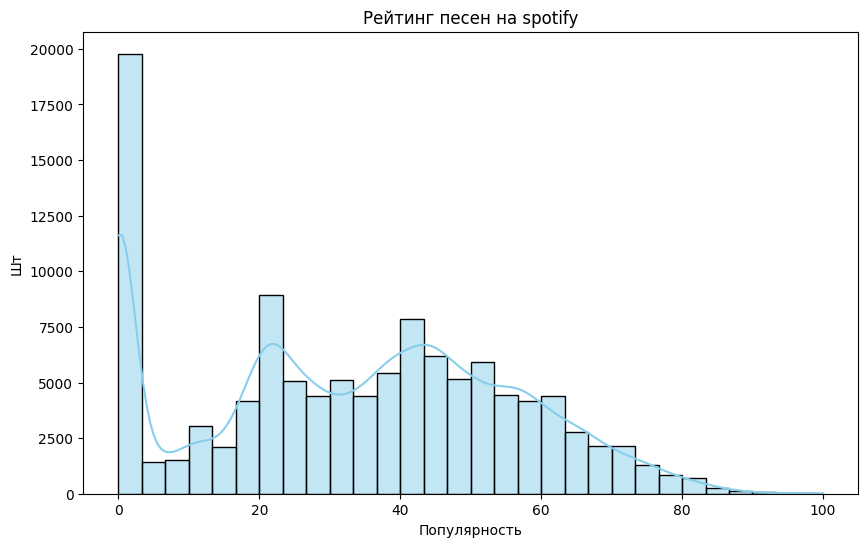

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(dataSet['popularity'], bins=30, kde=True, color="skyblue")
plt.title("Рейтинг песен на spotify")
plt.xlabel("Популярность")
plt.ylabel("Шт")
plt.show()

**На гистограмме видно, что большинство песен имеют средний уровень популярности, а количество треков с очень высокой популярностью (близкой к 100) сравнительно мало. Также мы видим, что есть немало песен с популярностью около нуля.
Вывод: Нужно смотреть по категориям песен, в каких жанрах, темпах, ладах они популярны и от чего это зависит**

## Различные графики зависимостей

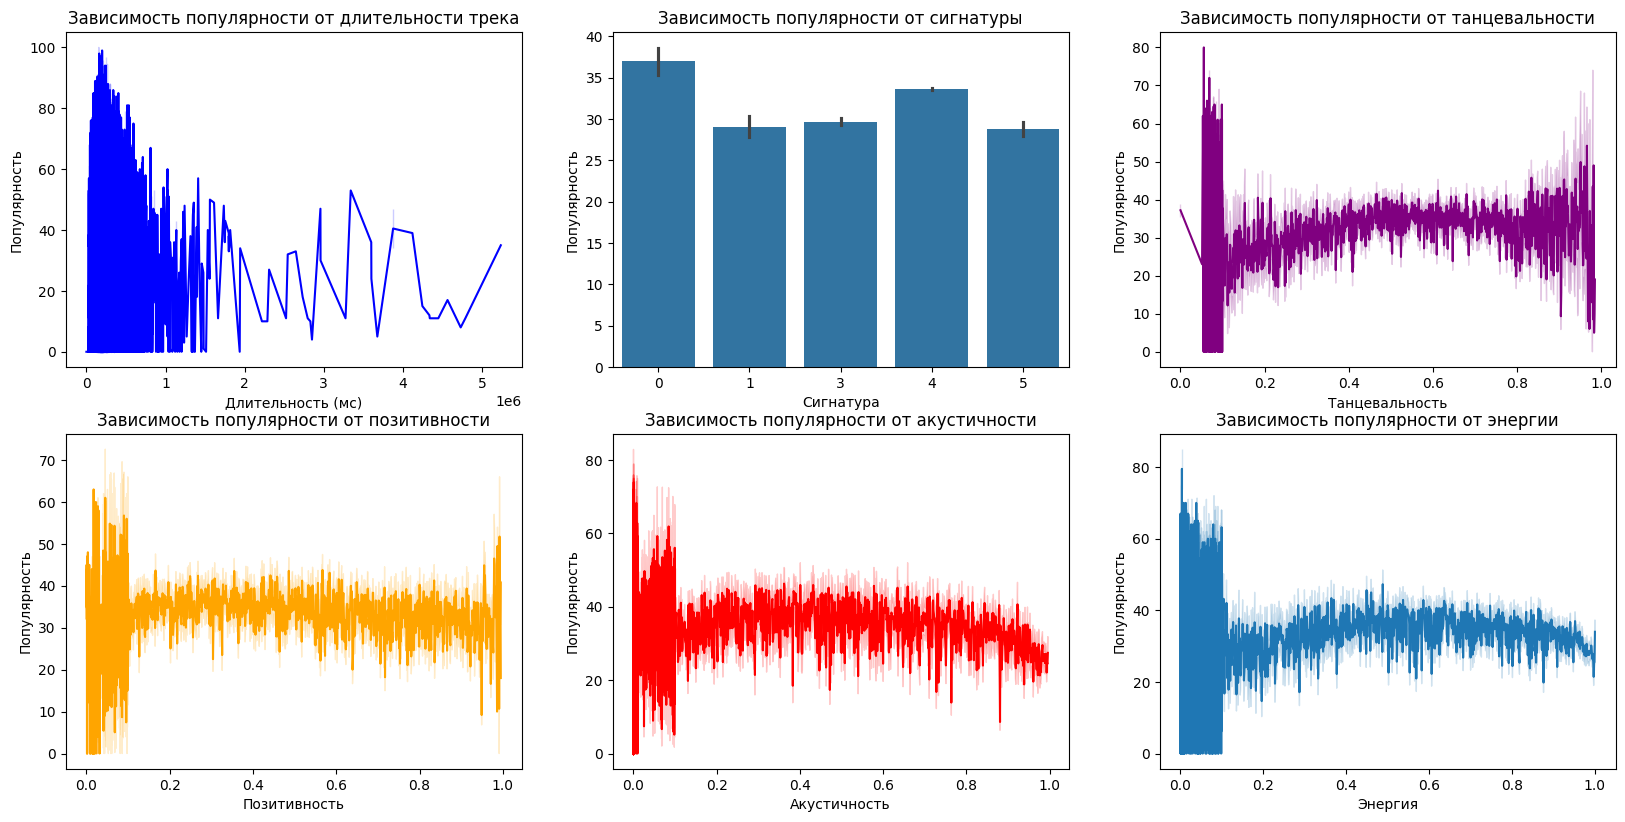

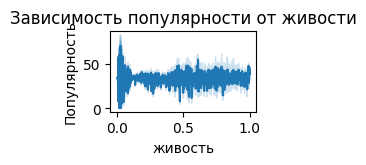

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 3, 1)
sns.lineplot(data=dataSet, x="duration_ms", y="popularity", color="blue")
plt.title("Зависимость популярности от длительности трека")
plt.xlabel("Длительность (мс)")
plt.ylabel("Популярность")

plt.subplot(4, 3, 2)
sns.barplot(data=dataSet, x="time_signature", y="popularity")
plt.title("Зависимость популярности от сигнатуры")
plt.xlabel("Сигнатура")
plt.ylabel("Популярность")

plt.subplot(4, 3, 3)
sns.lineplot(data=dataSet, x="danceability", y="popularity", color="purple")
plt.title("Зависимость популярности от танцевальности")
plt.xlabel("Танцевальность")
plt.ylabel("Популярность")

plt.subplot(4, 3, 4)
sns.lineplot(data=dataSet, x="valence", y="popularity", color="orange")
plt.title("Зависимость популярности от позитивности")
plt.xlabel("Позитивность")
plt.ylabel("Популярность")

plt.subplot(4, 3, 5)
sns.lineplot(data=dataSet, x="acousticness", y="popularity", color="red")
plt.title("Зависимость популярности от акустичности")
plt.xlabel("Акустичность")
plt.ylabel("Популярность")

plt.subplot(4, 3, 6)
sns.lineplot(data=dataSet, x='energy', y='popularity')
plt.title('Зависимость популярности от энергии')
plt.xlabel('Энергия')
plt.ylabel('Популярность')
plt.show()

plt.subplot(4, 3, 7)
sns.lineplot(data=dataSet, x='liveness', y='popularity')
plt.title('Зависимость популярности от живости')
plt.xlabel('живость')
plt.ylabel('Популярность')
plt.show()

# Показываем графики
plt.tight_layout()
plt.show()


Здесь приведен график зависимости популярности от "энергии", "длительности", "танцевальности", "позидивности", "акустичности" трека. Как видим, популярность очень сильно скачет вначале у каждого графика. Однако, у танцевальных треков график держится в среднем плотнее (выше 0.5). Также у графика "Живости" видим, что большая часть популярных треков (от 50) приходится на живость < 0.5. 
**Можно убрать сигнатуру трека из признаков**

## Проверить зависмость популярности от тональности

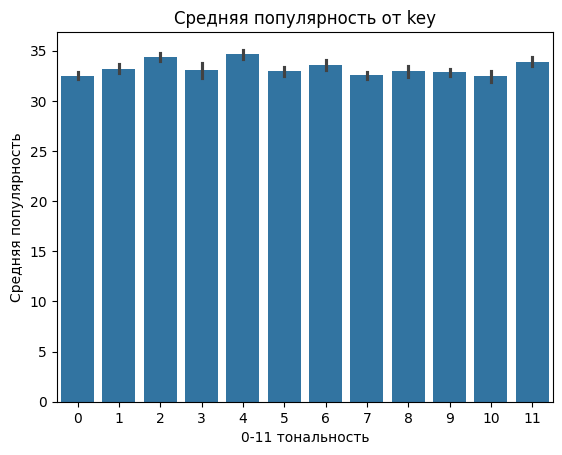

In [51]:
sns.barplot(x='key', y='popularity', data=dataSet)
plt.title('Средняя популярность от key')
plt.xlabel('0-11 тональность')
plt.ylabel('Средняя популярность')
plt.show()

**Вывод: Ни на что не влияет. У каждого +- одинаковая популярность, можно отбросить**

## Зависимость популярности от жанра трека

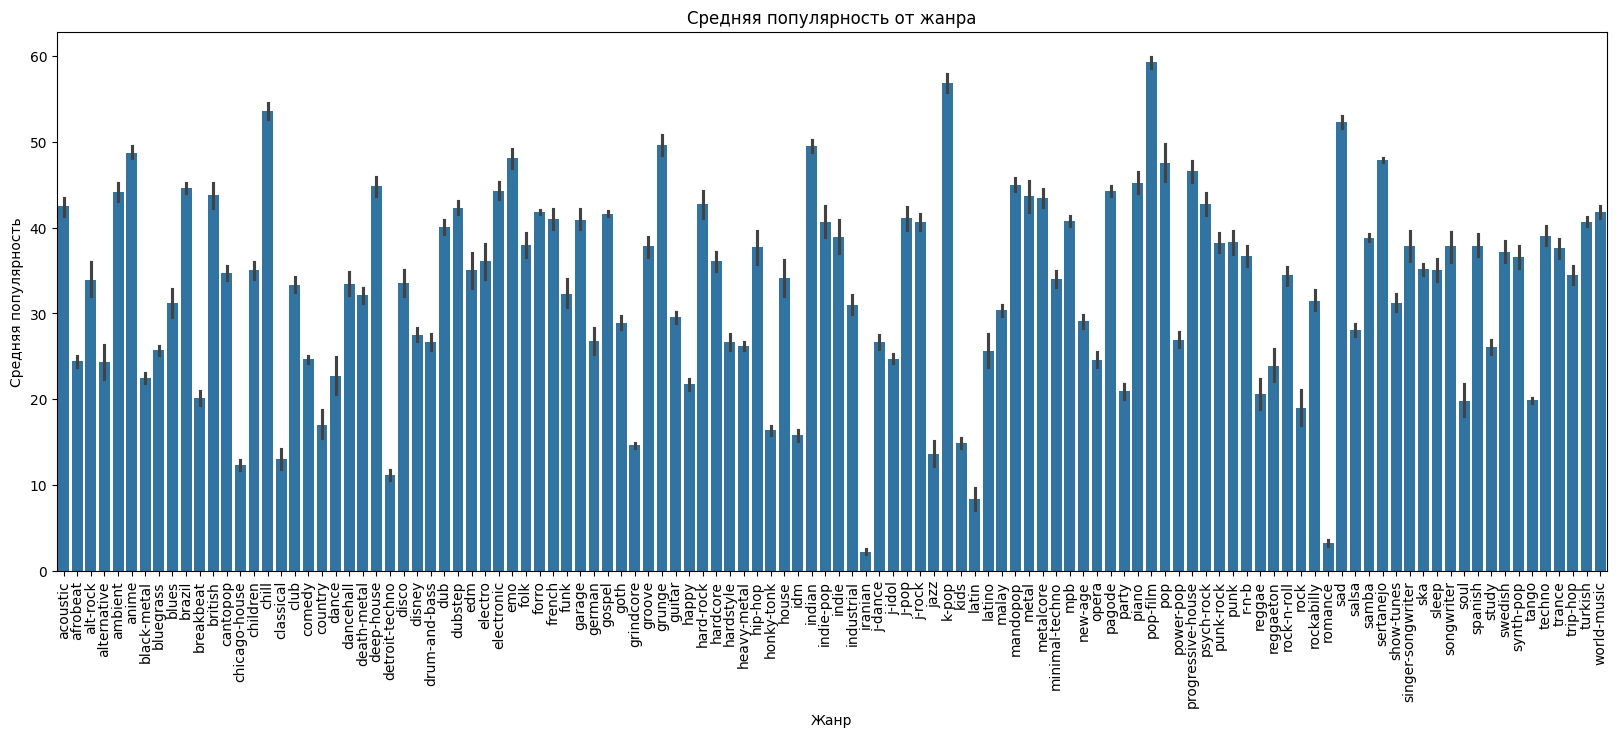

In [52]:
plt.figure(figsize=(20,7))
sns.barplot(x='track_genre', y='popularity', data=dataSet)
plt.title('Средняя популярность от жанра')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)
plt.show()

**Вывод: Трек жанр важный аспект популярности. Нужно перевести его в int формат прежде, чем залить в нейронную сеть**

## Хочу посмотреть график зависимости популярности от mode (минор/мажор)

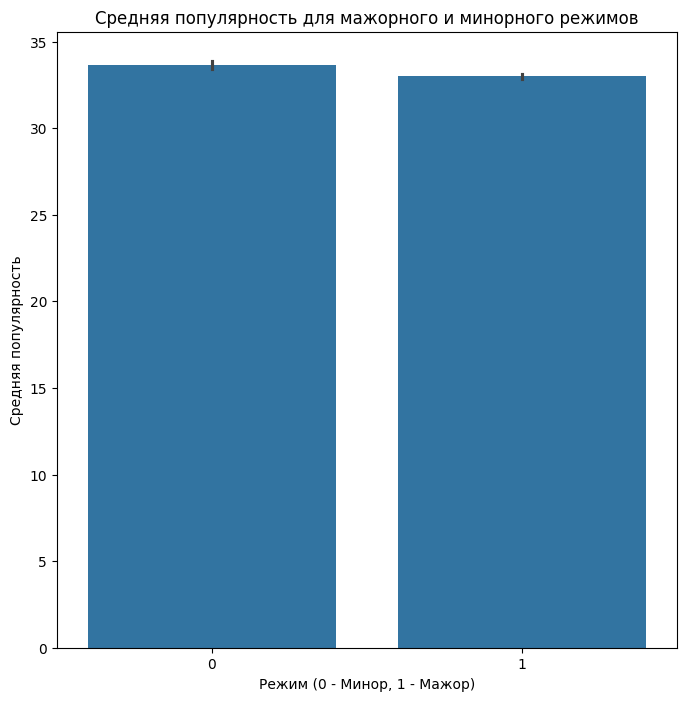

In [53]:
plt.figure(figsize=(8, 8))
sns.barplot(x='mode', y='popularity', data=dataSet, estimator='mean')
plt.title('Средняя популярность для мажорного и минорного режимов')
plt.xlabel('Режим (0 - Минор, 1 - Мажор)')
plt.ylabel('Средняя популярность')
plt.show()

**Вывод: Треки в обоих случаях примерно одинаковы по популярности. График особо ничего не дает. Его можно убрать из признаков**

## Посмотрим зависимость популярности от BPM. Считаю, что можно разделить темп на несколько категорий (slow, medium, fast)

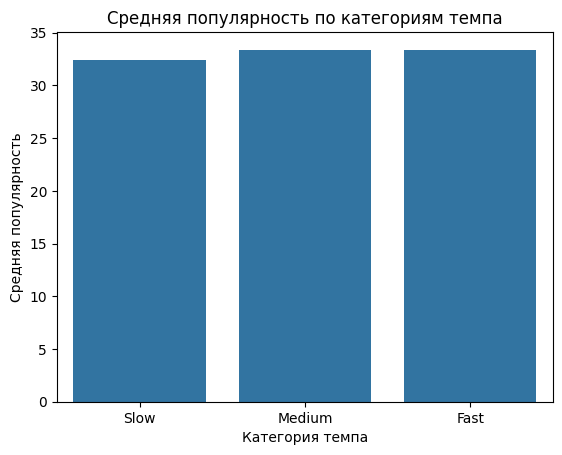

In [54]:
dataSet['tempo_category'] = pd.cut(dataSet['tempo'], bins=[dataSet['tempo'].min(), 90, 120, dataSet['tempo'].max()], labels=['Slow', 'Medium', 'Fast'])
tempo_popularity = dataSet.groupby('tempo_category', observed=True)['popularity'].mean()
sns.barplot(x=tempo_popularity.index, y=tempo_popularity.values)
plt.title('Средняя популярность по категориям темпа')
plt.xlabel('Категория темпа')
plt.ylabel('Средняя популярность')
plt.show()


**Вывод: От темпа тоже особо ничего не зависит. Его можно убрать, но оставить slow, medium, fast, как признак (перевести его в 0,1,2)**

## Также заметил возможную связь между speechiness (речетатив) и energy (энергия трека). Возможно, чем быстрее человек в треке проговаривает слова, тем больше энергичность трека.

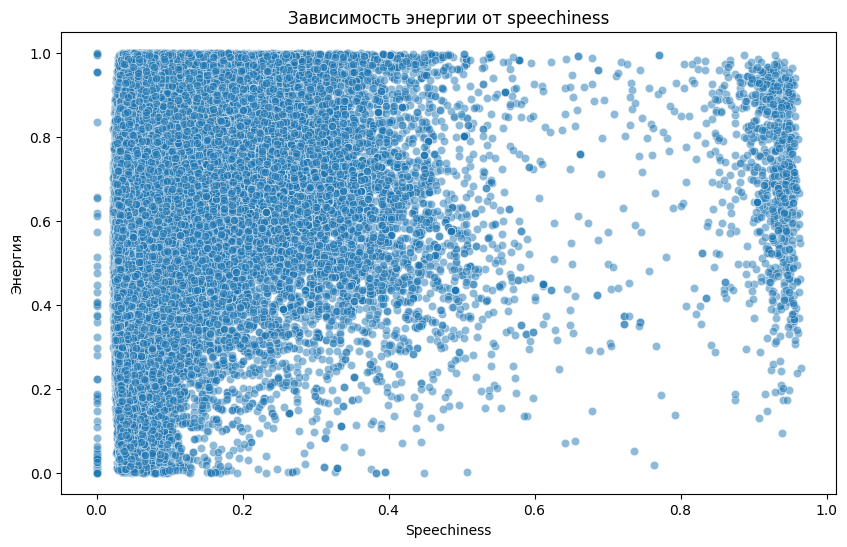

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataSet, x='speechiness', y='energy', alpha=0.5)
plt.title('Зависимость энергии от speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Энергия')
plt.show()


**Вывод: мое предположение оказалось ошибочным. Энергия не зависит от скорости "говорения" слов. Большая часть приходится на 0 речетатив и близкую к 1 энергию. Их нельзя соединить вместе, оставим так, как есть**

## Возможно, есть связь между liveness (живость) и acousticness (акустичность). Возможно, их можно соединить 

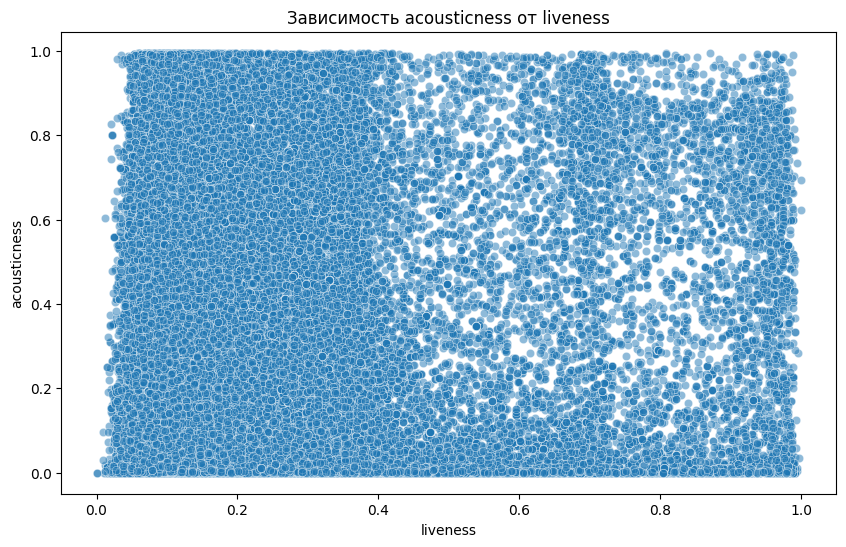

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataSet, x='liveness', y='acousticness', alpha=0.5)

plt.title('Зависимость acousticness от liveness')
plt.xlabel('liveness')
plt.ylabel('acousticness')
plt.show()

**Вывод: Их можно соединить вместе по формуле с гармоническим средним, как значимые для предсказания популярности**

## danceability и energy тоже схожи между собой. Проверим по графикам

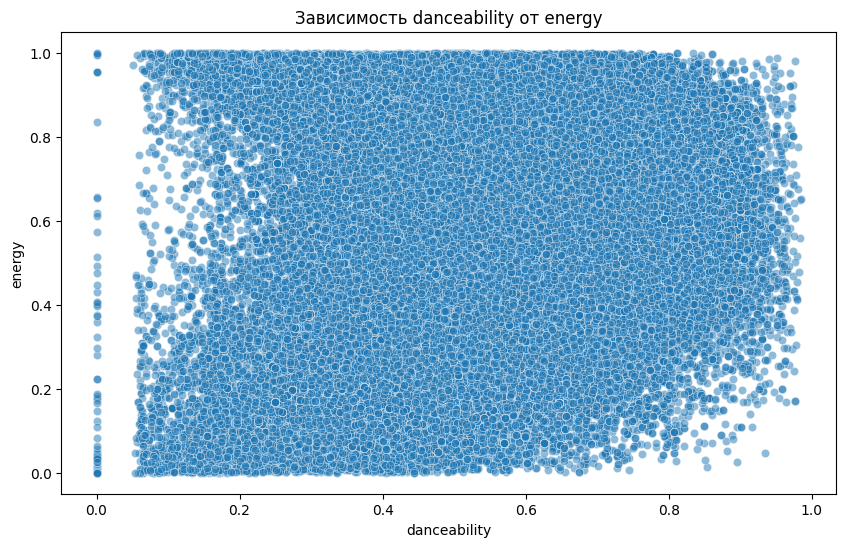

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataSet, x='danceability', y='energy', alpha=0.5)

plt.title('Зависимость danceability от energy')
plt.xlabel('danceability')
plt.ylabel('energy')
plt.show()

**Вывод: Их можно соединить вместе. По графику видно, что они коррелируют между собой. Вынесем в отдельный признак с гармоническим средним**

## Энергичные треки, обычно, бывают громкими. Посмотрим зависимость громкости от энергии

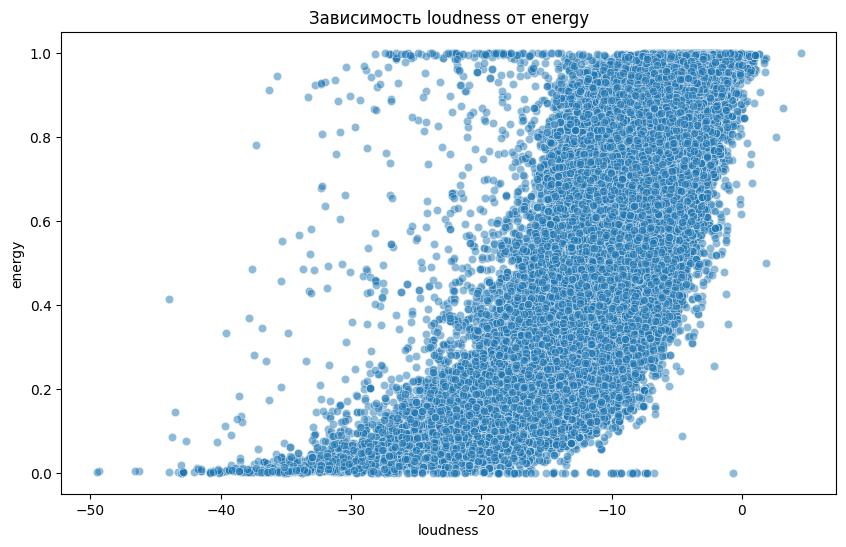

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataSet, x='loudness', y='energy', alpha=0.5)

plt.title('Зависимость loudness от energy')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.show()

**Вывод: Их можно соединить по формуле, но нужно нормализовать от 0 до 1 loudness**

## Смотрим график зависимости популярности от "матов" в треке

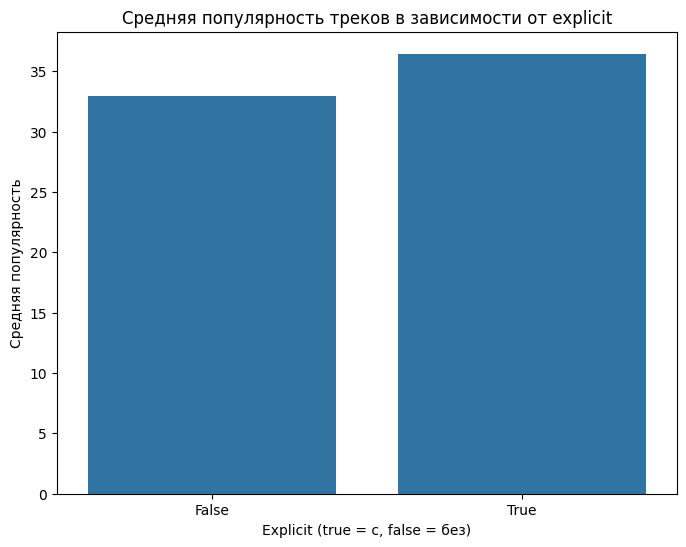

In [59]:
explicit_popularity = dataSet.groupby('explicit')['popularity'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values)
plt.title('Средняя популярность треков в зависимости от explicit')
plt.xlabel('Explicit (true = с, false = без)')
plt.ylabel('Средняя популярность')

plt.show()

**Вывод: Треки с ненормативной лексикой намного популярнее, чем без нее. Этот аспект является значимым для предсказания популярности**

# Modelling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dataset.csv')

In [22]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Ищем, удаляем дубликаты

In [3]:
df.value_counts('track_id')

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
4GPQDyw9hC1DiZVh0ouDVL    7
61202Zzk9rk4bPMZLh2gr6    7
                         ..
2rHfLANXNn5ppnW0jqv8h2    1
2rHX2oJ6sy9knGTBge4A3E    1
2rHJDOPLTw7w5NqrTg3iBb    1
2rHEyeBDE2w9jOMpTV1ICj    1
7zz7iNGIWhmfFE7zlXkMma    1
Name: count, Length: 89741, dtype: int64

In [4]:
df = df.drop_duplicates('track_id')

Преобразования по выводам

In [5]:
le = LabelEncoder()

df['explicit'] = df['explicit'].astype(int)
df['duration_ms'] = df['duration_ms']/60000

df['liveness_acousticness'] = 2 * df['liveness'] * df['acousticness'] / (df['liveness'] + df['acousticness'])
df['danceability_energy'] = 2 * df['danceability'] * df['energy'] / (df['danceability'] + df['energy'])

df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
df['loudness_energy'] = (df['loudness_normalized'] + df['energy']) / 2

df['tempo_category'] = pd.cut(df['tempo'], bins=[df['tempo'].min(), 90, 140, df['tempo'].max()], labels=['Slow', 'Medium', 'Fast'])
df['tempo_category'] = le.fit_transform(df['tempo_category'])

df['track_genre_int'] = le.fit_transform(df['track_genre'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             89741 non-null  int64  
 1   track_id               89741 non-null  object 
 2   artists                89740 non-null  object 
 3   album_name             89740 non-null  object 
 4   track_name             89740 non-null  object 
 5   popularity             89741 non-null  int64  
 6   duration_ms            89741 non-null  float64
 7   explicit               89741 non-null  int32  
 8   danceability           89741 non-null  float64
 9   energy                 89741 non-null  float64
 10  key                    89741 non-null  int64  
 11  loudness               89741 non-null  float64
 12  mode                   89741 non-null  int64  
 13  speechiness            89741 non-null  float64
 14  acousticness           89741 non-null  float64
 15  instru

Убираем не нужные колонки

In [7]:
df = df.drop(['track_name', 'album_name', 'artists', 'track_id', 'Unnamed: 0', 'tempo', 'time_signature', 'key', 'mode', 'loudness_normalized', 'track_genre'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   popularity             89741 non-null  int64  
 1   duration_ms            89741 non-null  float64
 2   explicit               89741 non-null  int32  
 3   danceability           89741 non-null  float64
 4   energy                 89741 non-null  float64
 5   loudness               89741 non-null  float64
 6   speechiness            89741 non-null  float64
 7   acousticness           89741 non-null  float64
 8   instrumentalness       89741 non-null  float64
 9   liveness               89741 non-null  float64
 10  valence                89741 non-null  float64
 11  liveness_acousticness  89739 non-null  float64
 12  danceability_energy    89740 non-null  float64
 13  loudness_energy        89741 non-null  float64
 14  tempo_category         89741 non-null  int32  
 15  track_

Проверяем на нулевые значения и убираем их

In [9]:
df.isnull().sum()

popularity               0
duration_ms              0
explicit                 0
danceability             0
energy                   0
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
liveness_acousticness    2
danceability_energy      1
loudness_energy          0
tempo_category           0
track_genre_int          0
dtype: int64

In [10]:
df = df.dropna()

# Нейронные сети

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Nadam

Epoch 1/50


c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1122/1122 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 565.9933 - val_loss: 402.5041
Epoch 2/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 440.0841 - val_loss: 383.7856
Epoch 3/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 431.2661 - val_loss: 383.1798
Epoch 4/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 425.1414 - val_loss: 380.4071
Epoch 5/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 419.5896 - val_loss: 381.8560
Epoch 6/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 415.3616 - val_loss: 379.0750
Epoch 7/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 415.6017 - val_loss: 376.8263
Epoch 8/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 413.8765 - val_loss: 376.3813
Epoch 9/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 407.9273 - val_loss: 374.2589
Epoch 10/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 406.4721 - val_loss: 373.7130
Epoch 11/50
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 402.9396 - val_loss: 374.80

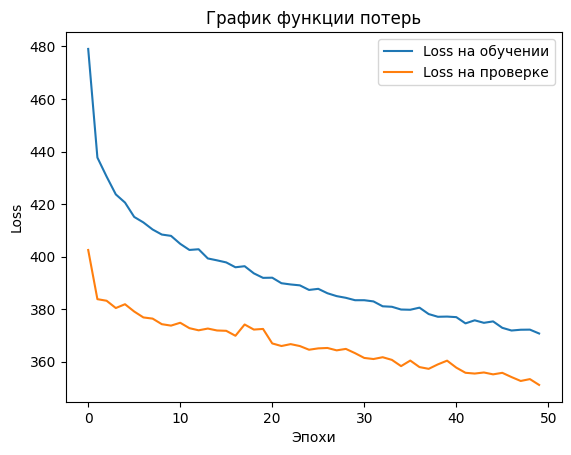

In [72]:
X = df.drop('popularity', axis=1)
y = df['popularity']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model.compile(optimizer=Nadam(learning_rate=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop]
)

test_loss = model.evaluate(X_test, y_test)
print(f"Тестовая Loss (Ошибка): {test_loss}")

plt.plot(history.history['loss'], label='Loss на обучении')
plt.plot(history.history['val_loss'], label='Loss на проверке')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()
plt.title('График функции потерь')
plt.show()


In [73]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 14.717303178664807
RMSE: 18.738550979518287


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━

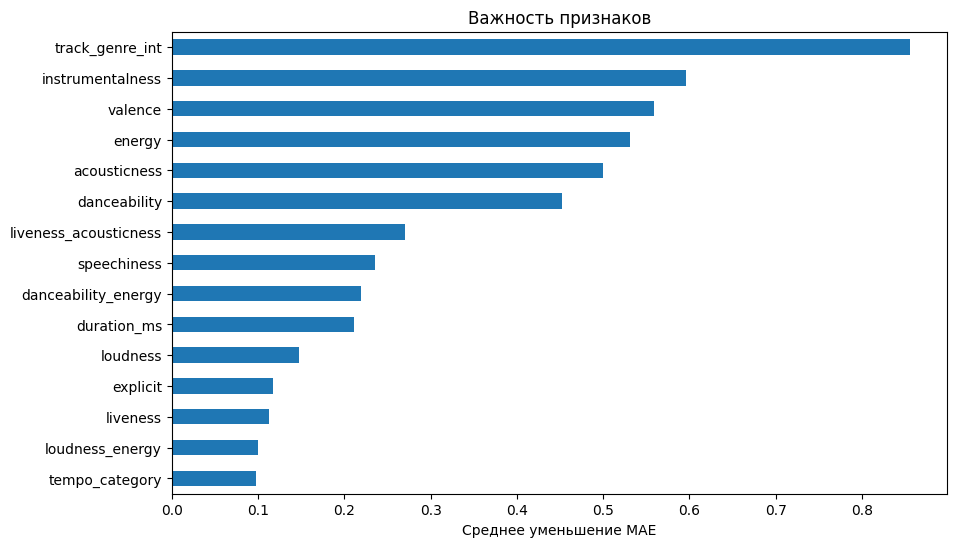

In [45]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

importances = pd.Series(result.importances_mean, index=df.drop('popularity', axis=1).columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Другие

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

train_loss = mean_squared_error(y_train, y_pred_train)
test_loss = mean_squared_error(y_test, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {test_loss}")

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Тренировочные потери: 409.1445743454582
Тестовые потери: 404.60521435573145
MAE: 16.527143618707566
MSE: 404.60521435573145
RMSE: 20.114800877854382


In [79]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

train_loss = mean_squared_error(y_train, y_pred_train)
test_loss = mean_squared_error(y_test, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {test_loss}")

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Тренировочные потери: 293.98561363314667
Тестовые потери: 314.28758108970027
MAE: 13.013211083518154
MSE: 314.28758108970027
RMSE: 17.728157859453425


In [80]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

train_loss = mean_squared_error(y_train, y_pred_train)
test_loss = mean_squared_error(y_test, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {test_loss}")

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Тренировочные потери: 273.1938088006425
Тестовые потери: 285.0541406846402
MAE: 12.685243790320595
MSE: 285.0541406846402
RMSE: 16.88354644867719


In [81]:
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16, 1), activation='relu', solver='adam', max_iter=200, random_state=42, early_stopping=True)
mlp_model.fit(X_train, y_train)

y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

train_loss = mean_squared_error(y_train, y_pred_train)
test_loss = mean_squared_error(y_test, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {test_loss}")

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Тренировочные потери: 341.5684977556712
Тестовые потери: 348.7604141637404
MAE: 14.625066764482634
MSE: 348.7604141637404
RMSE: 18.6751282234886


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from keras.optimizers import Nadam
X = df.drop('popularity', axis=1)
y = df['popularity']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Nadam(learning_rate=0.0005), loss='mean_squared_error')

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.to_numpy()[train_index], y_train.to_numpy()[val_index]

    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    val_loss = model.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(val_loss)
    print(f'Validation Loss for this fold: {val_loss}')

mean_cv_score = np.mean(cv_scores)
print(f'Mean Validation Loss from 5-Fold Cross Validation: {mean_cv_score}')

Epoch 1/50


c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 677.5118 - val_loss: 400.8291
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 420.8905 - val_loss: 388.8645
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 407.6773 - val_loss: 388.7909
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 407.1508 - val_loss: 382.4427
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 398.3437 - val_loss: 382.7204
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 401.6268 - val_loss: 383.4258
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 397.2631 - val_loss: 378.2808
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 393.5584 - val_loss: 378.5453
Epoch 9/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 393.1054 - val_loss: 375.7571
Epoch 10/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 392.3681 - val_loss: 377.5525
Epoch 11/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 392.3054 - val_loss: 374.2839
Epoch 12/50
898/898